In [39]:
import numpy as np
import pandas as pd

In [41]:
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve


In [43]:
df_full = pd.read_csv('creditcard.csv')
df_full.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
df_full.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [45]:
df_full.sort_values(by='Class', ascending=False, inplace=True) 
df_full.drop('Time', axis=1,  inplace = True)

In [46]:
df_full.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42635,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
135718,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,-1.886176,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1
10568,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,-11.627194,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00,1
215132,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,-6.428231,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
144104,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,-5.995676,...,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.00,1


In [47]:
df_sample = df_full.iloc[:3000,:]
df_sample.Class.value_counts()

0    2508
1     492
Name: Class, dtype: int64

In [48]:
feature = np.array(df_sample.values[:,0:29])
label = np.array(df_sample.values[:,-1])

In [49]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_sample, random_state=42)

df_train = shuffle_df[0:2400]
df_test = shuffle_df[2400:]

In [50]:
train_feature = np.array(df_train.values[:,0:29])
train_label = np.array(df_train.values[:,-1])
test_feature = np.array(df_test.values[:,0:29])
test_label = np.array(df_test.values[:,-1])

In [51]:
train_feature.shape

(2400, 29)

In [52]:
train_label.shape

(2400,)

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               6000      
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 479 samples, validate on 1921 samples
Epoch 1/200
 - 1s - loss: 0.6942 - acc: 0.4280 - val_loss: 0.6824 - val_acc: 0.8360
Ep

Epoch 86/200
 - 0s - loss: 0.1639 - acc: 0.9562 - val_loss: 0.1519 - val_acc: 0.9568
Epoch 87/200
 - 0s - loss: 0.1625 - acc: 0.9582 - val_loss: 0.1492 - val_acc: 0.9589
Epoch 88/200
 - 0s - loss: 0.1481 - acc: 0.9520 - val_loss: 0.1468 - val_acc: 0.9589
Epoch 89/200
 - 0s - loss: 0.1431 - acc: 0.9603 - val_loss: 0.1447 - val_acc: 0.9594
Epoch 90/200
 - 0s - loss: 0.1331 - acc: 0.9624 - val_loss: 0.1430 - val_acc: 0.9589
Epoch 91/200
 - 0s - loss: 0.1490 - acc: 0.9582 - val_loss: 0.1420 - val_acc: 0.9589
Epoch 92/200
 - 0s - loss: 0.1522 - acc: 0.9562 - val_loss: 0.1404 - val_acc: 0.9589
Epoch 93/200
 - 0s - loss: 0.1347 - acc: 0.9603 - val_loss: 0.1376 - val_acc: 0.9604
Epoch 94/200
 - 0s - loss: 0.1382 - acc: 0.9624 - val_loss: 0.1356 - val_acc: 0.9620
Epoch 95/200
 - 0s - loss: 0.1308 - acc: 0.9603 - val_loss: 0.1339 - val_acc: 0.9620
Epoch 96/200
 - 0s - loss: 0.1261 - acc: 0.9645 - val_loss: 0.1320 - val_acc: 0.9630
Epoch 97/200
 - 0s - loss: 0.1334 - acc: 0.9708 - val_loss: 0.130

Epoch 182/200
 - 0s - loss: 0.0652 - acc: 0.9854 - val_loss: 0.1149 - val_acc: 0.9719
Epoch 183/200
 - 0s - loss: 0.0698 - acc: 0.9812 - val_loss: 0.1163 - val_acc: 0.9714
Epoch 184/200
 - 0s - loss: 0.0690 - acc: 0.9812 - val_loss: 0.1162 - val_acc: 0.9714
Epoch 185/200
 - 0s - loss: 0.0702 - acc: 0.9791 - val_loss: 0.1150 - val_acc: 0.9719
Epoch 186/200
 - 0s - loss: 0.0634 - acc: 0.9812 - val_loss: 0.1141 - val_acc: 0.9708
Epoch 187/200
 - 0s - loss: 0.0709 - acc: 0.9791 - val_loss: 0.1138 - val_acc: 0.9714
Epoch 188/200
 - 0s - loss: 0.0708 - acc: 0.9875 - val_loss: 0.1140 - val_acc: 0.9708
Epoch 189/200
 - 0s - loss: 0.0632 - acc: 0.9854 - val_loss: 0.1152 - val_acc: 0.9714
Epoch 190/200
 - 0s - loss: 0.0644 - acc: 0.9854 - val_loss: 0.1169 - val_acc: 0.9714
Epoch 191/200
 - 0s - loss: 0.0645 - acc: 0.9833 - val_loss: 0.1166 - val_acc: 0.9714
Epoch 192/200
 - 0s - loss: 0.0677 - acc: 0.9875 - val_loss: 0.1155 - val_acc: 0.9714
Epoch 193/200
 - 0s - loss: 0.0651 - acc: 0.9833 - val

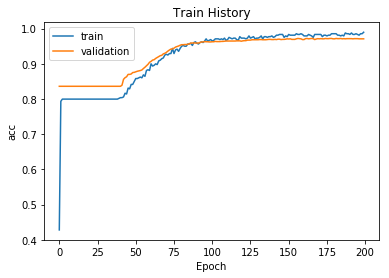

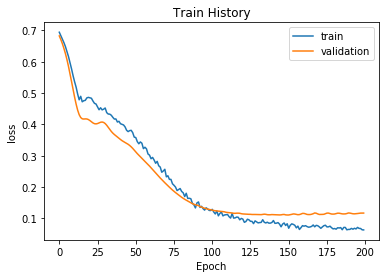

600/600 [==============================] - 0s 66us/step


('accuracy=', 0.97999999999999998)


In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt 
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential()


model.add(Dense(units=200, 
                input_dim=29, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1,  
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary()) 

model.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label,  
                          validation_split=0.8, epochs=200, 
                          batch_size=500, verbose=2) 

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

prediction = model.predict_classes(test_feature_trans)



In [58]:
df_ans = pd.DataFrame({'Real Class' :test_label})
df_ans['Prediction'] = prediction

In [59]:
df_ans[ df_ans['Real Class']!= df_ans['Prediction']]

,Real Class,Prediction
110,1.0,0
163,0.0,1
224,1.0,0
265,0.0,1
283,0.0,1
308,1.0,0
345,1.0,0
357,1.0,0
378,1.0,0
484,0.0,1


In [61]:
df_ans['Prediction'].value_counts()

0    521
1     79
Name: Prediction, dtype: int64

In [62]:
df_ans['Real Class'].value_counts()

0.0    519
1.0     81
Name: Real Class, dtype: int64

('total test case number:', 600)


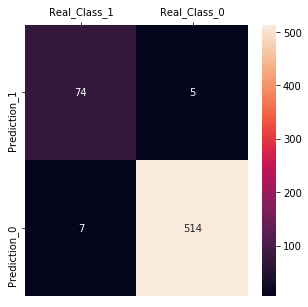

In [68]:
import seaborn as sns
%matplotlib inline

cols = ['Real_Class_1','Real_Class_0']
rows = ['Prediction_1','Prediction_0']

B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 0)])
B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 0)])

conf = np.array([[B1P1, B0P1],[B1P0, B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(df_cm, annot = True, ax = ax, fmt = 'd')
ax.xaxis.set_ticks_position('top')
print('total test case number:' , np.sum(conf))

In [82]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) 
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

('total_num: ', 600)
('G1P1: ', 74)
('G0P1: ', 5)
('G1P0: ', 7)
('G0P0: ', 514)
##########################
('sensitivity: ', 0)
('specificity: ', 0)
('false_positive_rate: ', 0)
('false_negative_rate: ', 0)


(600, 0, 0, 0, 0)

In [83]:
df_sample2 = df_full.iloc[:,:]
feature2 = np.array(df_sample2.values[:,0:29])
label2 = np.array(df_sample2.values[:,-1])

feature2_trans = scaler.transform(feature2) #using the same scaler as above

scores = model.evaluate(feature2_trans, label2)
print('\n')
print('accuracy=',scores[1])

prediction2 = model.predict_classes(feature2_trans)

284807/284807 [==============================] - 17s 61us/step


('accuracy=', 0.98654527451923579)


In [84]:
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99    284315
          1       0.10      0.88      0.18       492

avg / total       1.00      0.99      0.99    284807

[[280542   3773]
 [    59    433]]


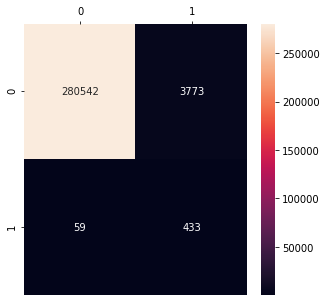

In [90]:
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top')

In [91]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) 
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

('total_num: ', 284807)
('G1P1: ', 280542)
('G0P1: ', 3773)
('G1P0: ', 59)
('G0P0: ', 433)
##########################
('sensitivity: ', 0)
('specificity: ', 0)
('false_positive_rate: ', 0)
('false_negative_rate: ', 0)


(284807, 0, 0, 0, 0)

In [92]:
df_sample2 = df_full.iloc[:,:] 
feature2 = np.array(df_sample2.values[:,0:29])
label2 = np.array(df_sample2.values[:,-1])

feature2_trans = scaler.transform(feature2)

In [93]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=ensemble.AdaBoostClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

/home/pradeep/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Traing Score:0.984583
Testing Score:0.981667


In [94]:
print("Testing Score:%f"%clf.score(feature2_trans, label2))

Testing Score:0.948435


In [95]:
prediction2 = clf.predict(feature2_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97    284315
          1       0.03      0.93      0.06       492

avg / total       1.00      0.95      0.97    284807

[[269662  14653]
 [    33    459]]


In [96]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) 
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

('total_num: ', 284807)
('G1P1: ', 269662)
('G0P1: ', 14653)
('G1P0: ', 33)
('G0P0: ', 459)
##########################
('sensitivity: ', 0)
('specificity: ', 0)
('false_positive_rate: ', 0)
('false_negative_rate: ', 0)


(284807, 0, 0, 0, 0)

In [97]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=ensemble.GradientBoostingClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

Traing Score:0.988333
Testing Score:0.973333


In [98]:
print("Testing Score:%f"%clf.score(feature2_trans, label2))

Testing Score:0.953453


In [99]:
prediction2 = clf.predict(feature2_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       1.00      0.95      0.98    284315
          1       0.03      0.94      0.07       492

avg / total       1.00      0.95      0.97    284807

[[271088  13227]
 [    30    462]]


In [100]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

('total_num: ', 284807)
('G1P1: ', 271088)
('G0P1: ', 13227)
('G1P0: ', 30)
('G0P0: ', 462)
##########################
('sensitivity: ', 0)
('specificity: ', 0)
('false_positive_rate: ', 0)
('false_negative_rate: ', 0)


(284807, 0, 0, 0, 0)

In [101]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

Traing Score:0.988333
Testing Score:0.981667


In [102]:
print("Testing Score:%f"%clf.score(feature2_trans, label2))

Testing Score:0.967589


In [103]:
prediction2 = clf.predict(feature2_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98    284315
          1       0.05      0.94      0.09       492

avg / total       1.00      0.97      0.98    284807

[[275115   9200]
 [    31    461]]
